In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv("tissue_classification_changes.csv")

In [5]:
df.head()

,Tissue,gain_final_Enteroendocrine,loss_final_Enteroendocrine,change_final_Enteroendocrine,total_before_final_Enteroendocrine,total_after_final_Enteroendocrine,gain_final_Enterocytes,loss_final_Enterocytes,change_final_Enterocytes,total_before_final_Enterocytes,...,gain_final_Leukocyte,loss_final_Leukocyte,change_final_Leukocyte,total_before_final_Leukocyte,total_after_final_Leukocyte,gain_final_Progenitor,loss_final_Progenitor,change_final_Progenitor,total_before_final_Progenitor,total_after_final_Progenitor
0,GCA020TIB_TISSUE02,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,29,13,0,125,142
1,GCA020TIB_TISSUE03,0,18,25,43,0,36,10,28,94,...,1,0,0,0,1,2327,431,30,2542,4451
2,GCA033TIB_TISSUE01,5,4,1,36,36,93,57,76,643,...,3,1,2,3,5,966,709,120,3608,3828
3,GCA033TIB_TISSUE02,0,0,0,0,0,17,22,21,216,...,7,4,1,7,15,1880,403,81,3359,4787
4,GCA033TIB_TISSUE03,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,63,68,0,169,164


In [11]:
import matplotlib.pyplot as plt

# Initialize dictionaries
total_gains = {}
total_losses = {}
total_changes = {}
total_before = {}
total_after = {}

# Calculate totals
for col in df.columns:
    if col.startswith('gain_final_'):
        class_name = col[len('gain_final_'):]
        total_gains[class_name] = df[col].sum()
    elif col.startswith('loss_final_'):
        class_name = col[len('loss_final_'):]
        total_losses[class_name] = df[col].sum()
    elif col.startswith('change_final_'):
        class_name = col[len('change_final_'):]
        total_changes[class_name] = df[col].sum()
    elif col.startswith('total_before_final_'):
        class_name = col[len('total_before_final_'):]
        total_before[class_name] = df[col].sum()
    elif col.startswith('total_after_final_'):
        class_name = col[len('total_after_final_'):]
        total_after[class_name] = df[col].sum()


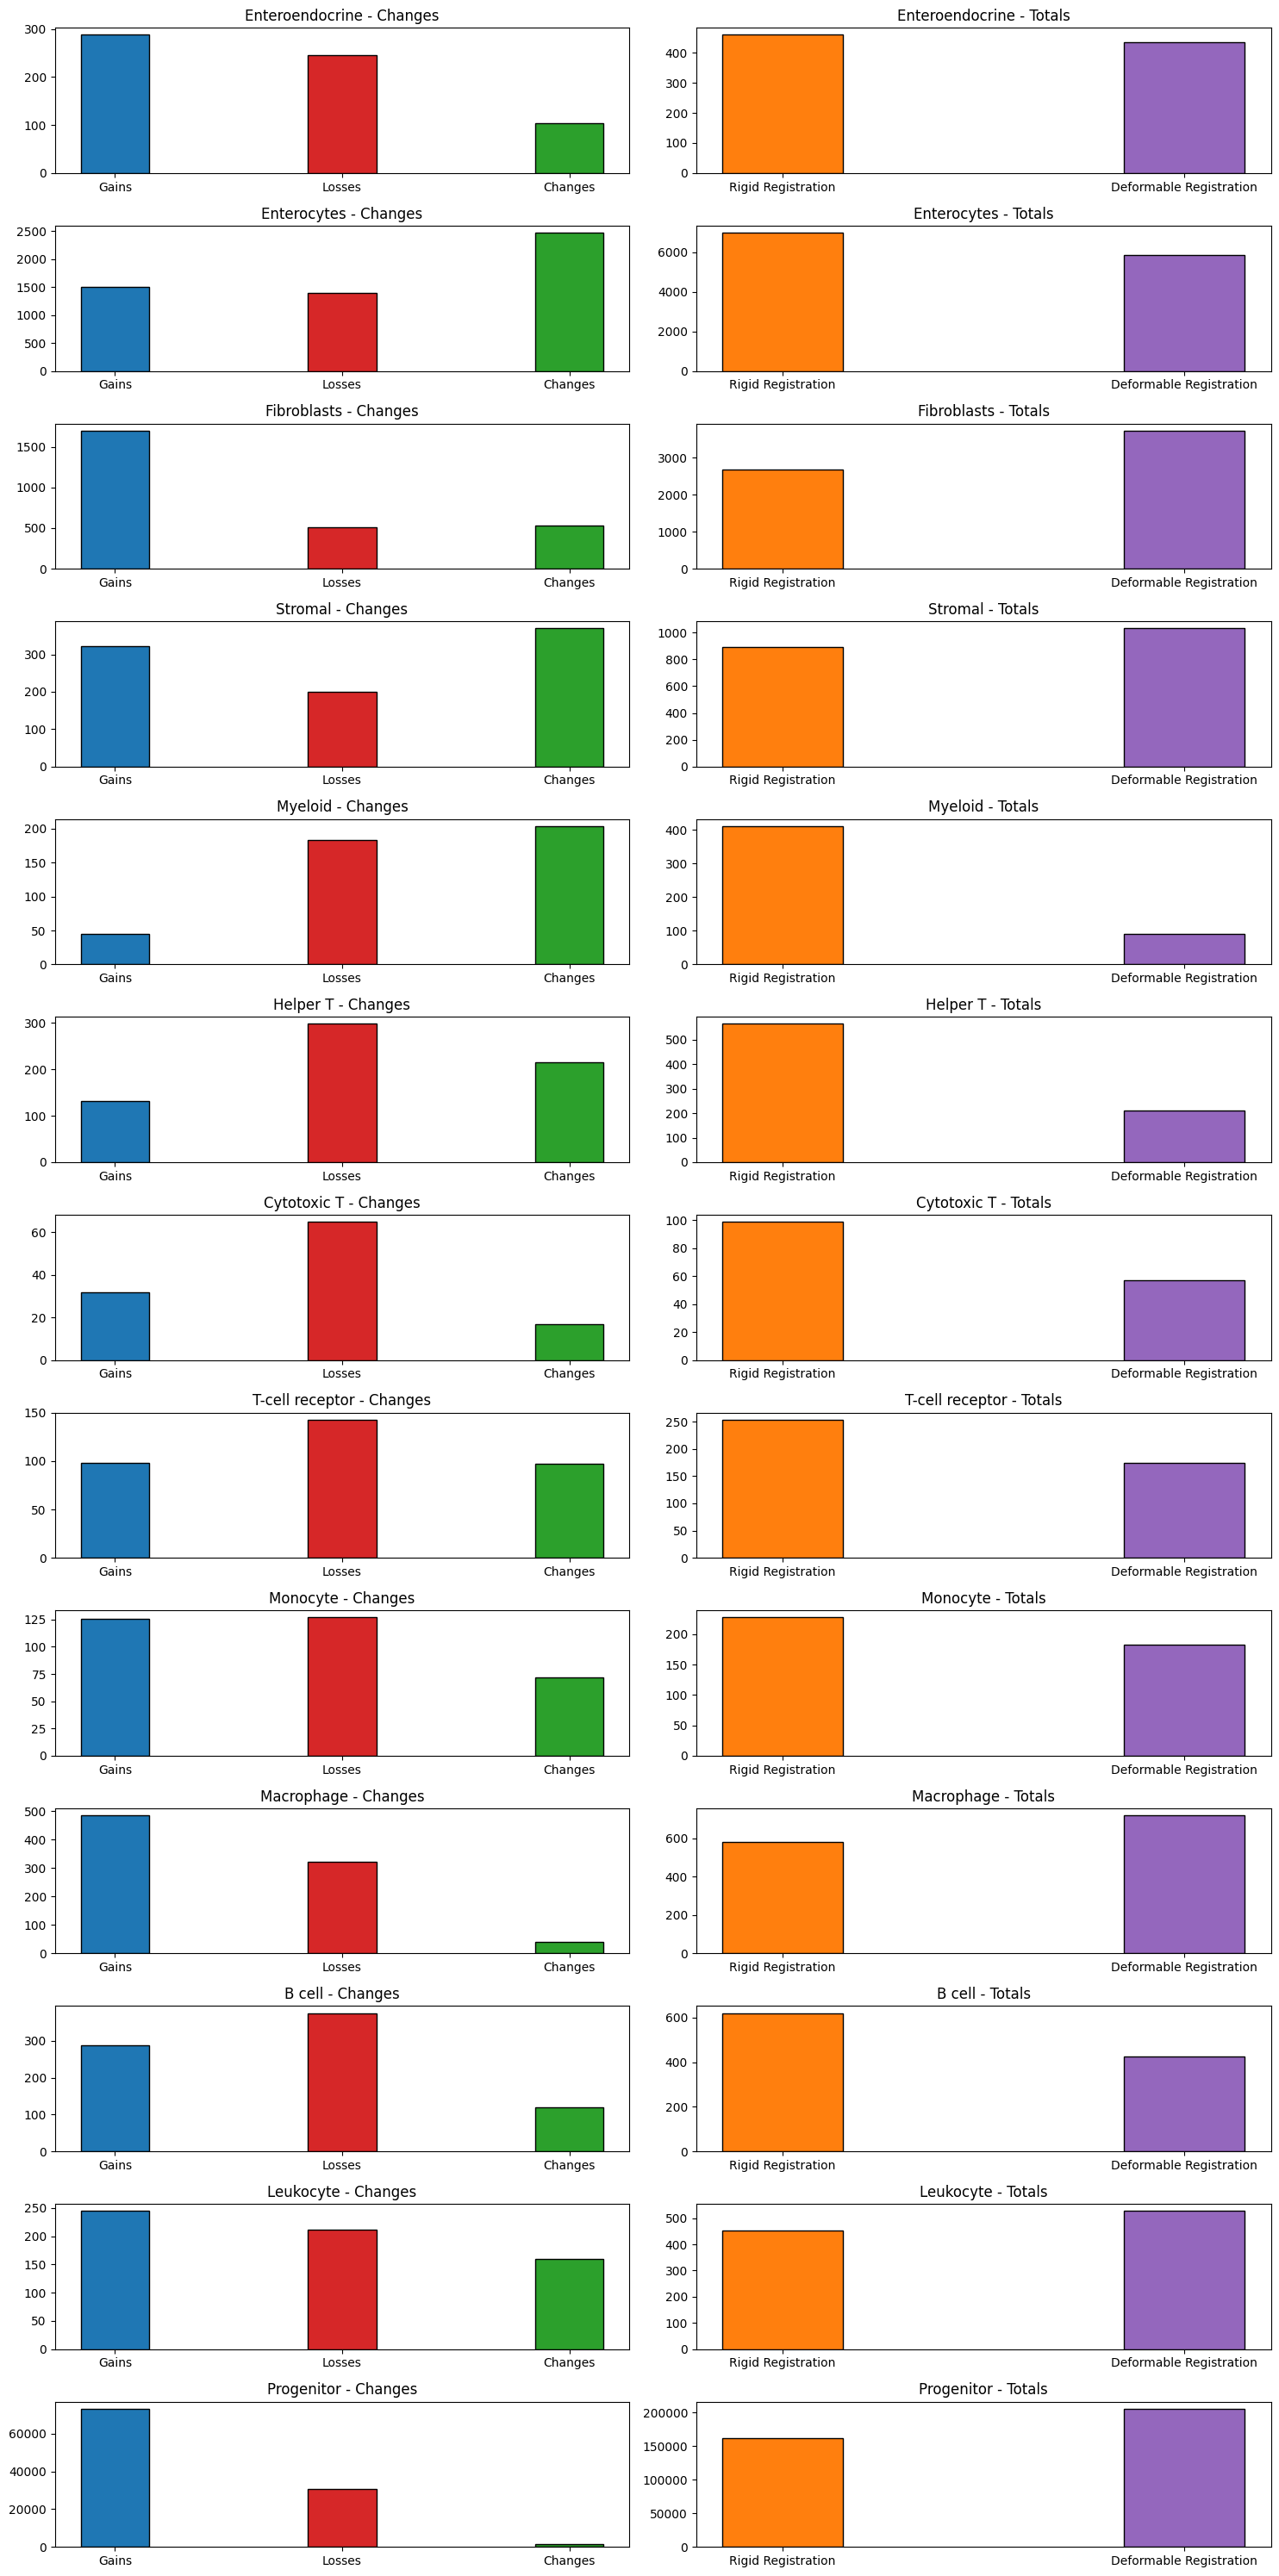

In [15]:
fig, axs = plt.subplots(len(total_gains.keys()), 2, figsize=(15, 30))

# Colors for the plots
color_scheme_changes = ['tab:blue', 'tab:red', 'tab:green']  # Colors for Gains, Losses, Changes
color_scheme_totals = ['tab:orange', 'tab:purple']  # Colors for Before, After

# Bar width
bar_width = 0.3

# Plot data
for i, class_name in enumerate(total_gains.keys()):
    # Bar positions
    positions = np.arange(3)

    # Plotting changes
    axs[i, 0].bar(positions, [total_gains[class_name], total_losses[class_name], total_changes[class_name]], 
                  width=bar_width, color=color_scheme_changes, edgecolor='black')
    axs[i, 0].set_title(f'{class_name} - Changes')
    axs[i, 0].set_xticks(positions)
    axs[i, 0].set_xticklabels(['Gains', 'Losses', 'Changes'])

    # Plotting totals
    positions_totals = np.arange(2)
    axs[i, 1].bar(positions_totals, [total_before[class_name], total_after[class_name]], 
                  width=bar_width, color=color_scheme_totals, edgecolor='black')
    axs[i, 1].set_title(f'{class_name} - Totals')
    axs[i, 1].set_xticks(positions_totals)
    axs[i, 1].set_xticklabels(['Rigid Registration', 'Deformable Registration'])

plt.tight_layout()
plt.show()